In [1]:
#WARNING TRACK OPTION NEEDS SIGNIFICANT MEMORY
import sys
import json
import time
import os

In [2]:
import pandas as pd

In [3]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import csc_matrix
from scipy.sparse import lil_matrix
from scipy.sparse import hstack
from scipy.sparse import vstack
from scipy.sparse.linalg import svds
import scipy.sparse
import matplotlib.pyplot as plt
import csv
import operator

In [4]:
ARTIST_MODE = False
files_to_use = 1000

In [5]:
data_location_desktop = "/home/ubutubiggerbetter/shared/data/spotify_data/data/new_new_formatted_data"
data_location_laptop = "/media/sf_VMDropBox/spotify_data/data/new_formatted_data"
data_location_laptop = "/media/sf_VMDropBox/spotify_data/data/tmp_test"
raw_data_location = os.path.join(data_location_desktop, '..')
data_location = data_location_desktop
save_location = data_location
NUM_PLAYLISTS = 1000000
NUM_TRACKS = 2262292
NUM_ARTISTS = 295860 #<- from stats.txt


isdir = os.path.isdir(data_location)
if isdir == False:
    print(data_location, ' does not exist')


In [6]:
#Helpful commands:
#type() tells type
#sys.getsizeof(obj) tell size in bytes of obj


In [7]:
def convert_to_full_charmat(artist_count, num_files, data_location, artist_mat = True):
    if artist_mat == True:
        full_mat_csc = csc_matrix((artist_count, 1000 * num_files))
    else:
        full_mat_csc = csc_matrix((artist_count, 1000 * num_files), dtype=np.uint8)
        full_mat_csc = full_mat_csc.tolil()
    inc = 0;
    filenum = 1;
    start_time = time.time()
    for i in range(0, num_files):
        #gen filename:
        if artist_mat == True:
            fname = 'charmat_pt_'+str(i)+'.npz'
            print('Loading ', fname)
            sparse_mat = scipy.sparse.load_npz(os.sep.join((data_location, fname)))
            sparse_mat = sparse_mat.astype(np.uint16)
            print(sparse_mat.shape)
            full_mat_csc[:, inc:(inc+1000)] = sparse_mat
        else:
            fname = 'track_charmat_pt_'+str(i)+'.npz'
            print('Loading ', fname)
            sparse_mat = scipy.sparse.load_npz(os.sep.join((data_location, fname)))
            sparse_mat = sparse_mat.astype(np.uint8)
            full_mat_csc[:, inc:(inc+1000)] = sparse_mat.tolil()

        inc = inc + 1000;
        print('Elapsed Time: ', (time.time() - start_time)/60, ' minutes')
    if artist_mat == True:
        return full_mat_csc
    else:
        full_mat_csc = full_mat_csc.astype(np.float64)
        return full_mat_csc.tocsc()


In [8]:
#Read individual files into one big char mat
if ARTIST_MODE == True:
    full_char_mat = convert_to_full_charmat(NUM_ARTISTS, files_to_use, data_location)
    scipy.sparse.save_npz(os.sep.join((save_location, 'artist_full_char_mat')), full_char_mat)
else:
    full_char_mat = convert_to_full_charmat(NUM_TRACKS, files_to_use, data_location, False)
    scipy.sparse.save_npz(os.sep.join((save_location, 'track_full_char_mat')), full_char_mat)

Loading  track_charmat_pt_0.npz
Elapsed Time:  1.0121437827746074  minutes
Loading  track_charmat_pt_1.npz
Elapsed Time:  2.0154698451360065  minutes
Loading  track_charmat_pt_2.npz
Elapsed Time:  3.022606003284454  minutes
Loading  track_charmat_pt_3.npz
Elapsed Time:  4.023452866077423  minutes
Loading  track_charmat_pt_4.npz
Elapsed Time:  5.0275979002316795  minutes
Loading  track_charmat_pt_5.npz
Elapsed Time:  6.03215852578481  minutes
Loading  track_charmat_pt_6.npz
Elapsed Time:  7.035153059164683  minutes
Loading  track_charmat_pt_7.npz
Elapsed Time:  8.034816781679789  minutes
Loading  track_charmat_pt_8.npz
Elapsed Time:  9.039448789755504  minutes
Loading  track_charmat_pt_9.npz
Elapsed Time:  10.043053416411082  minutes
Loading  track_charmat_pt_10.npz
Elapsed Time:  11.045916537443796  minutes
Loading  track_charmat_pt_11.npz
Elapsed Time:  12.044859488805136  minutes
Loading  track_charmat_pt_12.npz
Elapsed Time:  13.042913238207499  minutes
Loading  track_charmat_pt_13.

Elapsed Time:  111.32888842821122  minutes
Loading  track_charmat_pt_110.npz
Elapsed Time:  112.33819703261058  minutes
Loading  track_charmat_pt_111.npz
Elapsed Time:  113.36071549654007  minutes
Loading  track_charmat_pt_112.npz
Elapsed Time:  114.37951202392578  minutes
Loading  track_charmat_pt_113.npz
Elapsed Time:  115.40096819400787  minutes
Loading  track_charmat_pt_114.npz
Elapsed Time:  116.4105736732483  minutes
Loading  track_charmat_pt_115.npz
Elapsed Time:  117.43454811573028  minutes
Loading  track_charmat_pt_116.npz
Elapsed Time:  118.44198387463888  minutes
Loading  track_charmat_pt_117.npz
Elapsed Time:  119.45939964850744  minutes
Loading  track_charmat_pt_118.npz
Elapsed Time:  120.47838251193365  minutes
Loading  track_charmat_pt_119.npz
Elapsed Time:  121.50706307888031  minutes
Loading  track_charmat_pt_120.npz
Elapsed Time:  122.53359929323196  minutes
Loading  track_charmat_pt_121.npz
Elapsed Time:  123.54559630155563  minutes
Loading  track_charmat_pt_122.npz


Elapsed Time:  221.85135209957758  minutes
Loading  track_charmat_pt_217.npz
Elapsed Time:  222.88054005702335  minutes
Loading  track_charmat_pt_218.npz
Elapsed Time:  223.91373914082845  minutes
Loading  track_charmat_pt_219.npz
Elapsed Time:  224.95620142221452  minutes
Loading  track_charmat_pt_220.npz
Elapsed Time:  226.0056588411331  minutes
Loading  track_charmat_pt_221.npz
Elapsed Time:  227.0498193860054  minutes
Loading  track_charmat_pt_222.npz
Elapsed Time:  228.08446632623674  minutes
Loading  track_charmat_pt_223.npz
Elapsed Time:  229.15307227770487  minutes
Loading  track_charmat_pt_224.npz
Elapsed Time:  230.19932330449421  minutes
Loading  track_charmat_pt_225.npz
Elapsed Time:  231.23020353714625  minutes
Loading  track_charmat_pt_226.npz
Elapsed Time:  232.2626496553421  minutes
Loading  track_charmat_pt_227.npz
Elapsed Time:  233.3019488334656  minutes
Loading  track_charmat_pt_228.npz
Elapsed Time:  234.3455392718315  minutes
Loading  track_charmat_pt_229.npz
Elap

Elapsed Time:  334.86682182947794  minutes
Loading  track_charmat_pt_325.npz
Elapsed Time:  335.929393919309  minutes
Loading  track_charmat_pt_326.npz
Elapsed Time:  336.97183814048765  minutes
Loading  track_charmat_pt_327.npz
Elapsed Time:  338.0141470591227  minutes
Loading  track_charmat_pt_328.npz
Elapsed Time:  339.0778398076693  minutes
Loading  track_charmat_pt_329.npz
Elapsed Time:  340.1391142010689  minutes
Loading  track_charmat_pt_330.npz
Elapsed Time:  341.2123910387357  minutes
Loading  track_charmat_pt_331.npz
Elapsed Time:  342.2543200651805  minutes
Loading  track_charmat_pt_332.npz
Elapsed Time:  343.3152418176333  minutes
Loading  track_charmat_pt_333.npz
Elapsed Time:  344.35700782140094  minutes
Loading  track_charmat_pt_334.npz
Elapsed Time:  345.42163473765055  minutes
Loading  track_charmat_pt_335.npz
Elapsed Time:  346.4826877554258  minutes
Loading  track_charmat_pt_336.npz
Elapsed Time:  347.5480842590332  minutes
Loading  track_charmat_pt_337.npz
Elapsed T

Elapsed Time:  449.7914314587911  minutes
Loading  track_charmat_pt_433.npz
Elapsed Time:  450.86974438428877  minutes
Loading  track_charmat_pt_434.npz
Elapsed Time:  451.9244179725647  minutes
Loading  track_charmat_pt_435.npz
Elapsed Time:  452.9829307476679  minutes
Loading  track_charmat_pt_436.npz
Elapsed Time:  454.0542857646942  minutes
Loading  track_charmat_pt_437.npz
Elapsed Time:  455.12612450122833  minutes
Loading  track_charmat_pt_438.npz
Elapsed Time:  456.20120725631716  minutes
Loading  track_charmat_pt_439.npz
Elapsed Time:  457.25268349647524  minutes
Loading  track_charmat_pt_440.npz
Elapsed Time:  458.3468862652779  minutes
Loading  track_charmat_pt_441.npz
Elapsed Time:  459.4445063273112  minutes
Loading  track_charmat_pt_442.npz
Elapsed Time:  460.5095868468285  minutes
Loading  track_charmat_pt_443.npz
Elapsed Time:  461.5781551996867  minutes
Loading  track_charmat_pt_444.npz
Elapsed Time:  462.6640600522359  minutes
Loading  track_charmat_pt_445.npz
Elapsed 

Elapsed Time:  566.1748762170474  minutes
Loading  track_charmat_pt_541.npz
Elapsed Time:  567.2674412846566  minutes
Loading  track_charmat_pt_542.npz
Elapsed Time:  568.3716246724128  minutes
Loading  track_charmat_pt_543.npz
Elapsed Time:  569.4435134927431  minutes
Loading  track_charmat_pt_544.npz
Elapsed Time:  570.5099155267079  minutes
Loading  track_charmat_pt_545.npz
Elapsed Time:  571.5994515538216  minutes
Loading  track_charmat_pt_546.npz
Elapsed Time:  572.6930722633998  minutes
Loading  track_charmat_pt_547.npz
Elapsed Time:  573.7969690879186  minutes
Loading  track_charmat_pt_548.npz
Elapsed Time:  574.8612759232522  minutes
Loading  track_charmat_pt_549.npz
Elapsed Time:  575.9520206809044  minutes
Loading  track_charmat_pt_550.npz
Elapsed Time:  577.0132598400116  minutes
Loading  track_charmat_pt_551.npz
Elapsed Time:  578.1011966904005  minutes
Loading  track_charmat_pt_552.npz
Elapsed Time:  579.1907778143883  minutes
Loading  track_charmat_pt_553.npz
Elapsed Time

Elapsed Time:  685.2888903975487  minutes
Loading  track_charmat_pt_650.npz
Elapsed Time:  686.4202556093534  minutes
Loading  track_charmat_pt_651.npz
Elapsed Time:  687.5011092980702  minutes
Loading  track_charmat_pt_652.npz
Elapsed Time:  688.5802833199501  minutes
Loading  track_charmat_pt_653.npz
Elapsed Time:  689.6880605737368  minutes
Loading  track_charmat_pt_654.npz
Elapsed Time:  690.7991501291593  minutes
Loading  track_charmat_pt_655.npz
Elapsed Time:  691.9085516015689  minutes
Loading  track_charmat_pt_656.npz
Elapsed Time:  692.9942655762037  minutes
Loading  track_charmat_pt_657.npz
Elapsed Time:  694.1007657289505  minutes
Loading  track_charmat_pt_658.npz
Elapsed Time:  695.2144883275032  minutes
Loading  track_charmat_pt_659.npz
Elapsed Time:  696.2926424145699  minutes
Loading  track_charmat_pt_660.npz
Elapsed Time:  697.3664197166761  minutes
Loading  track_charmat_pt_661.npz
Elapsed Time:  698.4780083100001  minutes
Loading  track_charmat_pt_662.npz
Elapsed Time

Elapsed Time:  804.5922238906224  minutes
Loading  track_charmat_pt_758.npz
Elapsed Time:  805.7190347433091  minutes
Loading  track_charmat_pt_759.npz
Elapsed Time:  806.8444082776706  minutes
Loading  track_charmat_pt_760.npz
Elapsed Time:  807.9363186438878  minutes
Loading  track_charmat_pt_761.npz
Elapsed Time:  809.0340410669645  minutes
Loading  track_charmat_pt_762.npz
Elapsed Time:  810.1531576236089  minutes
Loading  track_charmat_pt_763.npz
Elapsed Time:  811.2758839805921  minutes
Loading  track_charmat_pt_764.npz
Elapsed Time:  812.400386416912  minutes
Loading  track_charmat_pt_765.npz
Elapsed Time:  813.486323316892  minutes
Loading  track_charmat_pt_766.npz
Elapsed Time:  814.6171462098757  minutes
Loading  track_charmat_pt_767.npz
Elapsed Time:  815.7102843999862  minutes
Loading  track_charmat_pt_768.npz
Elapsed Time:  816.8320413271587  minutes
Loading  track_charmat_pt_769.npz
Elapsed Time:  817.9522290150325  minutes
Loading  track_charmat_pt_770.npz
Elapsed Time: 

Elapsed Time:  925.3106633106868  minutes
Loading  track_charmat_pt_866.npz
Elapsed Time:  926.443321621418  minutes
Loading  track_charmat_pt_867.npz
Elapsed Time:  927.587809518973  minutes
Loading  track_charmat_pt_868.npz
Elapsed Time:  928.6890525817871  minutes
Loading  track_charmat_pt_869.npz
Elapsed Time:  929.7839380979538  minutes
Loading  track_charmat_pt_870.npz
Elapsed Time:  930.9192798495293  minutes
Loading  track_charmat_pt_871.npz
Elapsed Time:  932.0541154066722  minutes
Loading  track_charmat_pt_872.npz
Elapsed Time:  933.1936024109523  minutes
Loading  track_charmat_pt_873.npz
Elapsed Time:  934.2901026010513  minutes
Loading  track_charmat_pt_874.npz
Elapsed Time:  935.4246958414714  minutes
Loading  track_charmat_pt_875.npz
Elapsed Time:  936.5622937083244  minutes
Loading  track_charmat_pt_876.npz
Elapsed Time:  937.6596007823944  minutes
Loading  track_charmat_pt_877.npz
Elapsed Time:  938.7536809285482  minutes
Loading  track_charmat_pt_878.npz
Elapsed Time: 

Elapsed Time:  1047.3676787455877  minutes
Loading  track_charmat_pt_974.npz
Elapsed Time:  1048.4759821136793  minutes
Loading  track_charmat_pt_975.npz
Elapsed Time:  1049.629109855493  minutes
Loading  track_charmat_pt_976.npz
Elapsed Time:  1050.7862346132597  minutes
Loading  track_charmat_pt_977.npz
Elapsed Time:  1051.8966820200285  minutes
Loading  track_charmat_pt_978.npz
Elapsed Time:  1053.012339746952  minutes
Loading  track_charmat_pt_979.npz
Elapsed Time:  1054.1747985521952  minutes
Loading  track_charmat_pt_980.npz
Elapsed Time:  1055.3286568840344  minutes
Loading  track_charmat_pt_981.npz
Elapsed Time:  1056.4854028026264  minutes
Loading  track_charmat_pt_982.npz
Elapsed Time:  1057.5940645575524  minutes
Loading  track_charmat_pt_983.npz
Elapsed Time:  1058.7443377216657  minutes
Loading  track_charmat_pt_984.npz
Elapsed Time:  1059.8496189514797  minutes
Loading  track_charmat_pt_985.npz
Elapsed Time:  1061.0009281198184  minutes
Loading  track_charmat_pt_986.npz
E

(2262292, 1000000)
Elapsed:  904.2988138198853


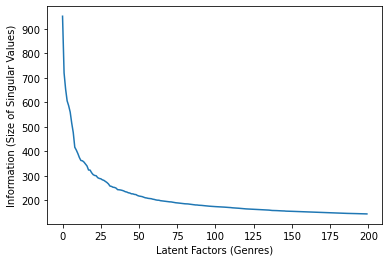

In [9]:
#Perform SVD:
kval = 200
start_time = time.time()
print(full_char_mat.shape)
U, S, VT = svds(full_char_mat, k = kval)
#Save the result:
Usparse = csc_matrix(U)
Ssparse = csc_matrix(S)
VTsparse = csc_matrix(VT)
scipy.sparse.save_npz(os.sep.join((save_location, 'U')), Usparse)
scipy.sparse.save_npz(os.sep.join((save_location, 'S')), Ssparse)
scipy.sparse.save_npz(os.sep.join((save_location, 'VT')), VTsparse)
print('Elapsed: ', time.time() - start_time)
plt.plot(S[::-1])
plt.xlabel('Latent Factors (Genres)')
plt.ylabel('Information (Size of Singular Values)')
plt.show()


In [10]:
#Flip matrices so that S is in descending order
S_sorted = S[::-1]
n = len(S)
U[:,0:n] = U[:, n-1::-1]
VT[0:n, :] = VT[n-1::-1,:]
print(VT.shape)
#VT is latent_factors x playlists


#if I have a query playlist, it's going to have artists in it giving it information
#if it's SVD'd with the rest of them...

(200, 1000000)


In [13]:
if ARTIST_MODE == True:
    # Recover Artist INformation
    artist_file = os.sep.join((data_location, "artist_index_new.csv"))
    artist_dict= {}
    art_index_dict = {}
    fobj = open(artist_file, "r")
    w = csv.DictReader(fobj)
    for row in w:
        artist_dict[row['artist_name']] = row['index']
        art_index_dict[row['index']] = row['artist_name']
    fobj.close()  
else:
    #Recover Track ingormation
    track_file = os.sep.join((data_location, "track_index_new.csv"))
    track_dict = {}
    track_index_dict = {}
    fobj = open(track_file, "r")
    w = csv.DictReader(fobj)
    for row in w:
        track_dict[row['track_name']] = row['index']
        track_index_dict[row['index']] = row['track_name']
    fobj.close()

#Recover Playlist Information:
playlist_file = os.sep.join((data_location, "tr_playlistname_index_new.csv"))
playlist_dict= {}
pl_index_dict = {}
fobj = open(playlist_file, "r")
w = csv.DictReader(fobj)
for row in w:
    playlist_dict[row['playlist_name']] = row['index']
    pl_index_dict[row['index']] = row['playlist_name']
fobj.close()

In [14]:
#Get first column of U [Artist to latent factors]
#This just gives a view of the latent factors that may exists using the track/artists and the
#playlist names to describe them
latent_factor_count = 50
top_values = 10
for i in range(0, latent_factor_count):
    
    rating_latentfactors = U[:, i]
    playlist_latentfactors = VT[i, :]
    #Get max assoiciated values
    #sorted_indices_art = np.argsort(np.abs(artist_latentfactors)
    #sorted_vals_art = np.sort(np.abs(artist_latentfactors))
                                    
    #ascending_indices_art = np.argsort(np.abs(artist_latentfactors))
    #ascending_indices_pl = np.argsort(np.abs(playlist_latentfactors))
    ascending_indices_rat = np.argsort(rating_latentfactors)
    ascending_indices_pl = np.argsort(playlist_latentfactors)
    sorted_indices_rat = ascending_indices_rat[::-1]
    sorted_indices_pl = ascending_indices_pl[::-1]
    
    #sorted_indices_pl = np.argsort(playlist_latentfactors)
    
    #ascending_indices_art = sorted_indices_art[::-1]
    #ascending_indices_pl= sorted_indices_pl[::-1]
    ratings_count = len(sorted_indices_rat)
    #Now, find the associated artists:
    print('\n\nTop', top_values, ' Ratings/Playlist Name for latent factor ', i, ':')
    if ARTIST_MODE == True:
        print('Best Artists:')
    else:
        print('Best Tracks: ')
    for j in range(0, top_values):
        if ARTIST_MODE == True:
            artist = art_index_dict[str(sorted_indices_rat[j])]
            print(artist, end=', ')
        else:
            track = track_index_dict[str(sorted_indices_rat[j])]
            print(track, end=', ')
            
    print('\nAssociated Names: ')
    for j in range(0, top_values):
        playlist_name = pl_index_dict[str(sorted_indices_pl[j])]
        print(playlist_name, end=', ')



Top 10  Ratings/Playlist Name for latent factor  0 :
Best Tracks: 
Ve Que, Fragrant Flowers, Flirty Butterflies - Hoa Thom Buom Luon, Drifting Blossoms, Floating Clouds - Beo Dat May Troi, Beo Dat May Troi, Frauenkirche - München, Kirchengeläut - Bremen, Kirchengeläut - Heidelberg, Kirchengeläut - Hamburg, Kirchengeläut - Leipzig, Kirchengeläut - Wien, 
Associated Names: 
Bells_1, viola, STUDY!, oldies_2518, Folk_119, MEDITATIONS, Flamenco_19, polka_4, Remixes_30, to_listen, 

Top 10  Ratings/Playlist Name for latent factor  1 :
Best Tracks: 
HUMBLE., XO TOUR Llif3, Mask Off, goosebumps, Bad and Boujee (feat. Lil Uzi Vert), Congratulations, Bounce Back, Slippery (feat. Gucci Mane), Tunnel Vision, DNA., 
Associated Names: 
Hip Hop_678, rap_2297, rap_1796, GOOD SONGS_10, Rap_2881, LIT🔥_39, litty _39, Playlist_240, turn up_427, Party_2680, 

Top 10  Ratings/Playlist Name for latent factor  2 :
Best Tracks: 
Yeah!, Ignition - Remix, Closer, Hollaback Girl, Party In The U.S.A., Promiscuou

Christian_1087, Christian_36, Christian_377, worship!_2, Worship Playlist , Worship Music_129, praise songs_1, oldies _246, Jesus_73, Worship_2909, 

Top 10  Ratings/Playlist Name for latent factor  21 :
Best Tracks: 
Oceans (Where Feet May Fail), Good Good Father, This Is Amazing Grace, Holy Spirit, Lord, I Need You, O Come to the Altar, Touch The Sky, How He Loves, Great Are You Lord, Lead Me to the Cross, 
Associated Names: 
Christian_1087, Christian_36, Worship Playlist , Jesus_73, Christian_377, worship!_2, Worship Music_129, God is good, Worship_2909, praise songs_1, 

Top 10  Ratings/Playlist Name for latent factor  22 :
Best Tracks: 
El Perdón, Despacito (Featuring Daddy Yankee), Hasta el Amanecer, Mi Gente, Ginza, Chantaje, Safari, Danza Kuduro, Bailando - Spanish Version, Borro Cassette, 
Associated Names: 
Latina_20, Latino_42, Musica_63, JODA, Español_313, La Gozadera_8, Perreo Intenso_2, Español_425, punchis punchis_3, Summer '17_303, 

Top 10  Ratings/Playlist Name for la

YEEZY_5, Kanye_98, Yeezy_56, YEEZUS_9, Yeezus_25, Kanye_117, Yeezy_39, Kanye West – Yeezus_4, Kanye West_3, Kanye_135, 

Top 10  Ratings/Playlist Name for latent factor  44 :
Best Tracks: 
Home, Sorry, The Hills, What Do You Mean?, Starboy, Gold Digger, Famous, Alive, Hallelujah, Caroline, 
Associated Names: 
Home _4, Hallelujah_21, HOME_23, Thanksgiving_43, Home_276, oldies_2675, eh_152, Boyfriend_2, home sweet home_1, Study Music_257, 

Top 10  Ratings/Playlist Name for latent factor  45 :
Best Tracks: 
Starboy, Slide, Can't Feel My Face, Redbone, The Hills, I Feel It Coming, Panda, Lean On (feat. MØ & DJ Snake), Party Monster, Let Me Love You, 
Associated Names: 
Disney Channel_8, summer 17_398, throwback_1262, Hip Hop_860, Throwback_1544, When We Were Young_5, childhood_157, Rap_624, OMFG_3, Neo Soul_39, 

Top 10  Ratings/Playlist Name for latent factor  46 :
Best Tracks: 
Santeria, Three Little Birds, Is This Love, What I Got, Could You Be Loved, Better Together, Blessings, Sorry,

In [15]:
def recommend_on_playlist(playlist_contents, query_playlist_index, pl_index_dict, \
                          art_index_dict, VT, full_char_mat, latentfactors_to_use = 3, \
                          playlists_to_use = 20, num_recommendations=20):
    print('playlist_name: ', pl_index_dict[str(query_playlist_index)])
    #get the max latent factors index assocaited with the query
    asc_sorted_indices_pl = np.argsort(VT[:,query_playlist_index])
    sorted_indices_pl = asc_sorted_indices_pl[::-1]

    #Use the sorted_indices_pl to map into applicable artists (U)
    recommended_artists = {}
    playlists_used = {}
    MAX_PLAYLISTS = VT.shape[1]
    k = 0
    full_char_mat = full_char_mat.tolil()
    for i in range(0, latentfactors_to_use):
        print(i, ' out of ', latentfactors_to_use)
        #Get the max latent factor index
        latent_factor_i = sorted_indices_pl[i]
        #Get all the playlists' latent factor for this index (corresponds to a given genre)
        latent_factors_v_playlists = VT[latent_factor_i, :]
        #Get the largest values which will be largest latent factors corresponding
        #to this genre
        asc_similar_playlist_indices = np.argsort(latent_factors_v_playlists)
        similar_playlist_indices = asc_similar_playlist_indices[::-1]
    
        playlists_to_use_loop = playlists_to_use
        k = 0
        while k < playlists_to_use_loop:
            #Make sure it's not the query playlist:
            if similar_playlist_indices[k] != query_playlist_index and str(similar_playlist_indices[k]) not in playlists_used:
                print('Similar Playlist is: ', pl_index_dict[str(similar_playlist_indices[k])])
                #Add to the dictionary (so we don't redo)
                playlists_used[str(similar_playlist_indices[k])] = pl_index_dict[str(similar_playlist_indices[k])]
                #get the index; this will be the most similar playlist for the largest latent
                #factor of the query playlist (for now)
                similar_playlist_index = similar_playlist_indices[k]
                #Map the index into original charmat to get similar artists:
                playlists_artists_indices = full_char_mat[:, similar_playlist_index]
            
                #Tally the most similar artists
                non_zero_artist_indices = playlists_artists_indices.nonzero()
                for j in non_zero_artist_indices[0]:
                    nz_index = j
                    if art_index_dict[str(nz_index)] in recommended_artists:
                        recommended_artists[art_index_dict[str(nz_index)]] = recommended_artists[art_index_dict[str(nz_index)]] + 1
                    else:
                        recommended_artists[art_index_dict[str(nz_index)]] = 1
            else:
                if playlists_to_use_loop + 1 < MAX_PLAYLISTS:
                    playlists_to_use_loop = playlists_to_use_loop + 1
            k = k+1
    
    sorted_dict = sorted(recommended_artists.items(), key=operator.itemgetter(1), reverse=True)

    top_recommended_artists = []
    

    #Just go through and compare to queried playlist, as long as item is not
    #already in, then add it (note: with artists this may be dicey....)
    i = 0
    for item, value in sorted_dict:
        if item not in playlist_contents:
            if i >= num_recommendations:
                break
            top_recommended_artists.append(item)
            i = i+1

    return top_recommended_artists

In [16]:
def playlist_lookup(json_locations, playlist_index):
    #Can construct the filename based on the number of the playlist index 
    #also assuming 0 indexed, so
    file_start = 'mpd.slice.'
    file_end = '.json'
    candidate_val = playlist_index/1000
    print(candidate_val)

        
    from_num = int(np.floor(candidate_val)) * 1000
    to_num = int(np.ceil(candidate_val)) * 1000 -1
    if candidate_val == np.ceil(candidate_val):
        to_num = int(np.ceil(candidate_val + 1)) * 1000 - 1
    file_mid = str(from_num) + '-' + str(to_num)
    fname = file_start + file_mid + file_end
    
    
    print('Loading ', fname)
    f = open(os.path.join(json_locations, fname))
    #Get the json reader:
    js = f.read()
    f.close()
    mpd_slice = json.loads(js)
    q_playlist = mpd_slice['playlists'][playlist_index-from_num]
    tracks = set()
    artists = set()
    for track in q_playlist['tracks']:
        tracks.add(track['track_name'])
        artists.add(track['artist_name'])

    return artists, tracks

In [23]:
playlist_to_test = 10010

latent_factors_used = 2
playlists_referenced = 200
desired_recommendations = 20
start_time = time.time()
artists, tracks = playlist_lookup(raw_data_location, playlist_to_test)
if ARTIST_MODE == True:
    recommendations = recommend_on_playlist(artists, playlist_to_test, pl_index_dict, \
                                            art_index_dict, VT, full_char_mat, \
                                            latent_factors_used, playlists_referenced, \
                                            desired_recommendations)
else:
    recommendations = recommend_on_playlist(tracks, playlist_to_test, pl_index_dict, \
                                            track_index_dict, VT, full_char_mat, \
                                            latent_factors_used, playlists_referenced, \
                                            desired_recommendations)
print('Elapsed: ', time.time() - start_time)
print('Recommendations: ', recommendations)
print('\nOriginal Tracks: ', tracks)
print('\nOriginal Artists:', artists)

10.01
Loading  mpd.slice.10000-10999.json
playlist_name:  DRIVE
0  out of  2
Similar Playlist is:  Hallelujah_21
Similar Playlist is:  pretty_18
Similar Playlist is:  My feels_8
Similar Playlist is:  Chill_3828
Similar Playlist is:  Emo trash_1
Similar Playlist is:  My Music_5
Similar Playlist is:  coffeehouse_3
Similar Playlist is:  Cool Playlist_9
Similar Playlist is:  music_700
Similar Playlist is:  chill out_294
Similar Playlist is:  peace_6
Similar Playlist is:  my favorites_34
Similar Playlist is:  emo playlist_5
Similar Playlist is:  lel
Similar Playlist is:  7th grade_9
Similar Playlist is:  chill_745
Similar Playlist is:  happy place_23
Similar Playlist is:  Everything_22
Similar Playlist is:  ~All my songs~
Similar Playlist is:  2016_1127
Similar Playlist is:  Wanderlust_19
Similar Playlist is:  now_133
Similar Playlist is:  relax_232
Similar Playlist is:  homework_91
Similar Playlist is:  Fall_48
Similar Playlist is:  Alternative_350
Similar Playlist is:  eMo MuSic.
Similar 

KeyboardInterrupt: 